In [15]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

# Annealing method for 2D Thompson atomic mode

We want to simulate a system composed of Coulomb charges in a two-dimensional trap (Thompson atomic model) by using the classical Monte Carlo method and using the annealing method to find the minimal energy configuration.

The Metropolis Monte Carlo code to simulate a system consisting of $N$ Coulomb charges in a 2D harmonic trap. The potential energy is given by
$$E_{pot}=\sum_{i=1}^N{\frac12m\omega²r_i²}+\sum_{i<j}^N{\frac{q²}{\left|\mathbf r_i-\mathbf r_j\right|}}$$

We choose dimensionless units of length $r_0$ and energy $E_0$ in such a way that $E_0=\frac12m\omega^2r_0=\frac{q^2}{r_0}$, and we use the following dimensionless variables:
    position $\tilde r = r/r_0$
    energy $\tilde E = E/E_0$
    temperature $\tilde T = k_BT/E_0$
Using these units, the potential energy becomes
$$\tilde E_{pot}=\sum_{i=1}^N{\tilde r_i²}+\sum_{i<j}^N{\frac1{\left|\mathbf{\tilde r}_i-\mathbf{\tilde r}_j\right|}}$$

In [16]:
def potential(N, R):
    E = 0
    for i in range(N):
        E += (R[i,0]**2 + R[i,1]**2)
        for j in range(i+1,N):
            E += 1/np.sqrt((R[i,0]-R[j,0])**2 + (R[i,1]-R[j,1])**2)
    return E

def MaxBoltz(N, R, Rp, T):
    return math.exp(-(potential(N,Rp) - potential(N, R))/T)

In [17]:
def globalMode(N, R, T, Delta):
    Rp = np.zeros((N,2))
    
    # Moving all particles
    for i in range(N):
        ux = (random.random()*2-1)*Delta
        uy = (random.random()*2-1)*Delta

        Rp[i] = R[i] + [ux,uy]

    # Acceptance probability
    w = MaxBoltz(N, R, Rp, T)
    
    if potential(N,Rp) - potential(N, R) < 0:
        return Rp
    # Metropolis test
    if int(random.random() + w) > 0:
        return R
    else:
        return Rp

In [18]:
def singleMove(N, R, T, Delta):
    Rp = np.zeros((N,2))

    # Moving a single particle
    j = np.random.randint(N)
    
    ux = (random.random()*2-1)*Delta
    uy = (random.random()*2-1)*Delta

    Rp[j] = R[j] + [ux,uy]

    # Acceptance probability
    w = MaxBoltz(N, R, Rp, T)
    
    if potential(N,Rp) - potential(N, R) < 0:
        return Rp
    # Metropolis test
    if int(random.random() + w) > 0:
        R = Rp
    return R

def localMove(N, R, T, Delta):
    Rp = np.zeros((N,2))

    for j in range(N):
        Rp = R.copy()

        ux = (random.random()*2-1)*Delta
        uy = (random.random()*2-1)*Delta

        Rp[j] = R[j] + [ux,uy]

        # Acceptance probability
        w = MaxBoltz(N, R, Rp, T)
        
        if potential(N,Rp) - potential(N, R) < 0:
            return Rp
        # Metropolis test
        if int(random.random() + w) > 0:
            R = Rp
    return R

  0%|          | 0/100000 [00:00<?, ?it/s]C:\Users\giova\AppData\Local\Temp\ipykernel_10684\380186065.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  E += 1/np.sqrt((R[i,0]-R[j,0])**2 + (R[i,1]-R[j,1])**2)
100%|██████████| 100000/100000 [01:34<00:00, 1058.68it/s]


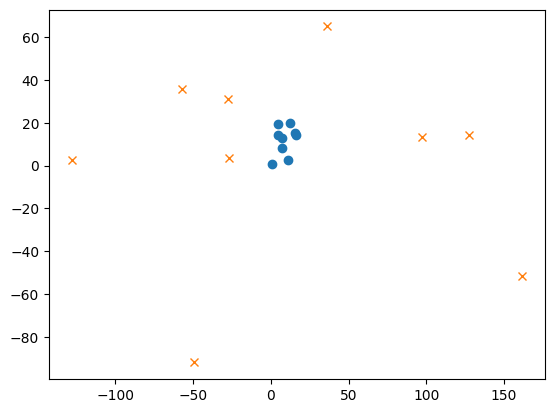

[[ 161.8531305   -51.71471017]
 [ 127.64208475   14.51793527]
 [-128.22833774    2.70220231]
 [ -57.20068937   35.59020891]
 [ -49.51285442  -91.88370365]
 [  97.22113671   13.50934763]
 [ -27.75960063   31.23578362]
 [ -27.19809981    3.42334838]
 [  35.96476992   64.96101173]]
Final potential energy: 94902.59452994273


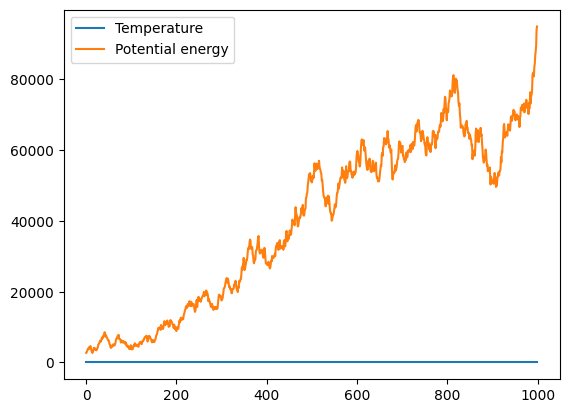

In [28]:

from tqdm import tqdm  # for progress bar (optional)

N = 9 # number of charges
T0 = 10 # Temperatures
Delta = 0.5 # maximum displacement

# Generate a random initial configuration
R0 = np.random.rand(N, 2) * 20 

R = R0
T = T0

# Number of Monte Carlo steps
nsteps = 1000

Temp = np.zeros(nsteps)
Epot = np.zeros(nsteps)

with tqdm(total=nsteps*100) as pbar:
    for i in range(nsteps):

        for j in range(100):
            pbar.update()
            # Global move
            R = globalMode(N, R, T, Delta)
            # Single move
            R = singleMove(N, R, T, Delta)
        
        # Cooling
        T = T * 0.999

        # Store temperature and energy
        Temp[i] = T
        Epot[i] = potential(N, R)

# Plot initial and final configurations
plt.plot(R0[:,0],R0[:,1],'o')
plt.plot(R[:,0],R[:,1],'x')
plt.show()

print(R)
print('Final potential energy:', potential(N, R))

# Plot temperature and energy
plt.plot(Temp, label='Temperature')
plt.plot(Epot, label='Potential energy')
plt.legend()
plt.show()
